In [1]:
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from getdist import *

# import planckStyle
import pylab
import numpy as np
import tkinter
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker

import corner 
# matplotlib.use('TkAgg')
%matplotlib inline

In [48]:
dir_name = '/home/isidro/Documents/github/cosmo_tools/models/nled/chains_nled/'



roots = [
         'NLED_phy_HD_nested_multi',
         'NLED_phy_SN_nested_multi',
         'NLED_phy_HD+SN_nested_multi',
        ]

roots_bao = ['NLED_phy_CBAO_nested_multi', 'NLED_phy_HD+SN+CBAO_nested_multi']




In [49]:
g = plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, 
                          analysis_settings={'smooth_scale_2D': 0.4,
                                             'smooth_scale_1D': 0.4, 
                                             'ignore_rows': 0.2})

<Figure size 720x648 with 0 Axes>

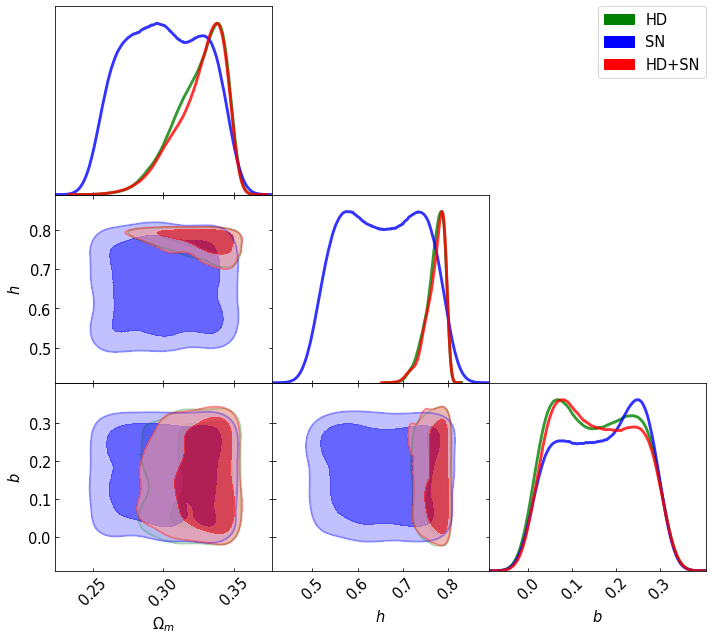

In [50]:
#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15   
g.settings.lw1 = 3
g.settings.linewidth_contour = 2


g.triangle_plot(roots, ['Om','h', 'b'],               
# g.triangle_plot(roots, ['Om', 'Obh2', 'h'],
                diag1d_kwargs={'colors':['green', 'blue', 'red'], 
                               'alphas':[0.8, 0.8, 0.8]},
                colors=['green', 'blue', 'red'],
                alphas = [0.4, 0.6, 0.6],
                legend_labels=['HD', 'SN', 'HD+SN'
                               ],
                legend_loc='upper right',
                filled = True,
                normalized=False, shaded=False, 
#                 param_limits={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]},
                
#                 parampriors={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]}
           )

# g.add_text('Quintom with $\\beta$', x= 0.35, y= 2.5, fontsize=14)
#            \n 350 live points \n 0.2 burn', 0.1, 2)        
# plt.grid()
# plt.savefig('nled_250lp.png', dpi=300)
plt.savefig('img/nled_250lp_HD_SN.png', dpi=300)

/home/isidro/Documents/github/cosmo_tools/models/nled/chains_nled/NLED_phy_HD_nested_multi_1.txt
Removed 0.1 as burn in
/home/isidro/Documents/github/cosmo_tools/models/nled/chains_nled/NLED_phy_SN_nested_multi_1.txt
Removed 0.1 as burn in
/home/isidro/Documents/github/cosmo_tools/models/nled/chains_nled/NLED_phy_HD+SN_nested_multi_1.txt
Removed 0.1 as burn in


<Figure size 1000x1000 with 0 Axes>

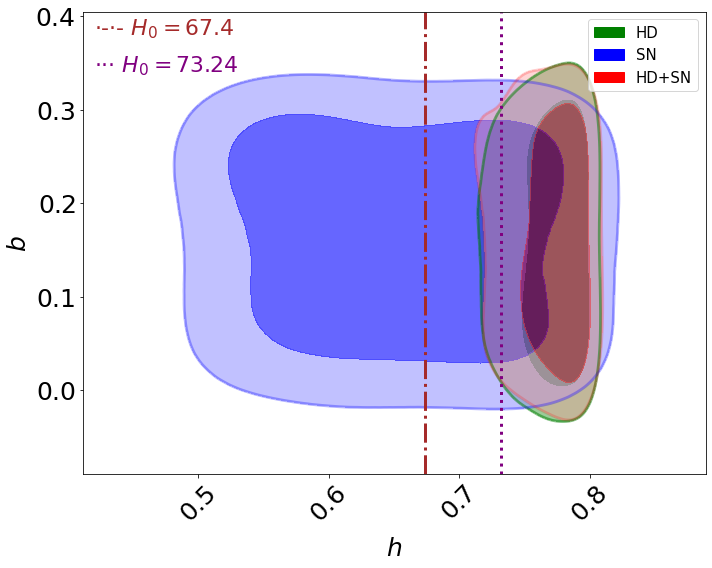

In [51]:
plt.figure(figsize=(10, 10), dpi=100)

gg= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.8, 
                          analysis_settings={'smooth_scale_2D': 0.5,
                                             'smooth_scale_1D': 0.5, 
                                             'ignore_rows': 0.1})

gg.settings.lab_fontsize = 25
gg.settings.x_label_rotation= 45
gg.settings.legend_fontsize = 15
gg.settings.axes_fontsize = 25 
gg.settings.linewidth_meanlikes = 5
gg.settings.linewidth_contour = 1


# plt.figure(figsize=(10,8))
gg.plot_2d(roots, 'h', 'b', colors=['green', 'blue', 'red'], 
          filled=True, alphas = [1, 0.6, 0.4], 
          legend_loc='upper right')

# gg.add_y_marker(0, color='green', lw=3.0)
gg.add_x_marker(0.7324, color='purple', lw=3.0, ls='dotted')
gg.add_x_marker(0.674, color='brown', lw=3.0, ls='dashdot')

plt.text(0.42, 0.38, '·-·- $H_0 = 67.4$', fontsize=22, color='brown')
plt.text(0.42, 0.34, '··· $H_0 = 73.24$', fontsize=22, color='purple')
# plt.text(0.3, 10, '--- $\\beta = 0$', fontsize=22, color='green')

gg.add_legend(['HD', 'SN', 'HD+SN'])
# plt.grid()
plt.savefig('img/hvsb_hd_sn.png', dpi=80)

/home/isidro/Documents/github/cosmo_tools/models/nled/chains_nled/NLED_phy_HD_nested_multi_1.txt
Removed 0.2 as burn in
/home/isidro/Documents/github/cosmo_tools/models/nled/chains_nled/NLED_phy_SN_nested_multi_1.txt
Removed 0.2 as burn in
/home/isidro/Documents/github/cosmo_tools/models/nled/chains_nled/NLED_phy_HD+SN_nested_multi_1.txt
Removed 0.2 as burn in


<Figure size 1000x1000 with 0 Axes>

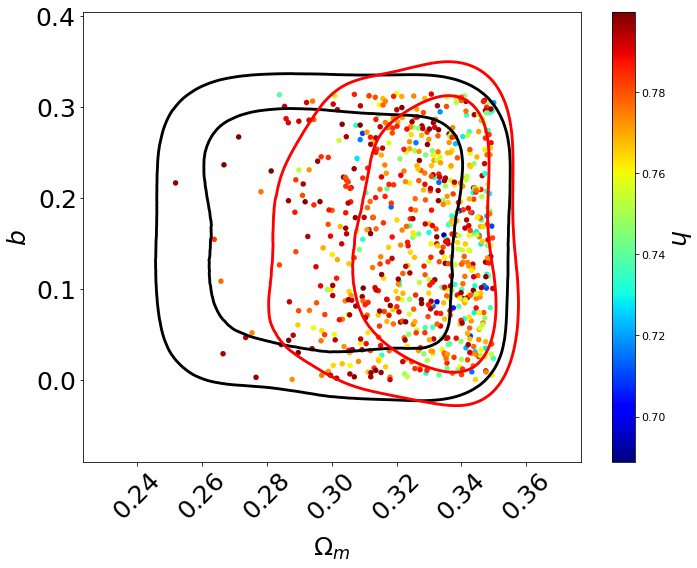

In [52]:
plt.figure(figsize=(10, 10), dpi=100)

gg= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.8, 
                          analysis_settings={'smooth_scale_2D': 0.5,
                                             'smooth_scale_1D': 0.5, 
                                             'ignore_rows': 0.2})

gg.settings.lab_fontsize = 25
gg.settings.x_label_rotation= 45
gg.settings.legend_fontsize = 15
gg.settings.axes_fontsize = 25 
gg.settings.linewidth_contour = 1



# plt.figure(figsize=(10,8))
gg.plot_3d(roots, ['Om', 'b','h'], 
          legend_loc='upper right', scatter_size=30)

# max_scatter_points – if set, maximum number of points to plots from each root)


# gg.add_legend(['CBAO+HD+SN'])
# plt.xlim(-0.01, 4.2)
# plt.ylim(-0.01, 3.2)
# plt.grid()
# plt.savefig('mphinvsmphan_QuintomCouple.png', dpi=80)

<Figure size 720x648 with 0 Axes>

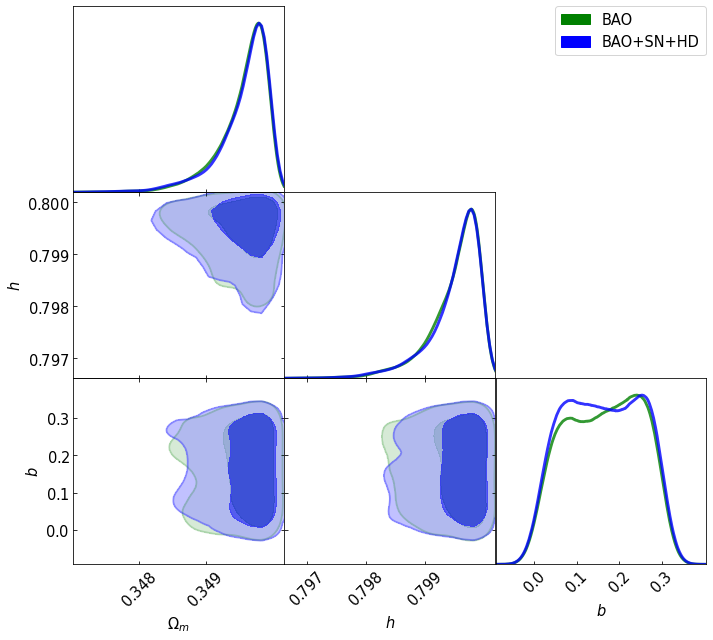

In [54]:
g = plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, 
                          analysis_settings={'smooth_scale_2D': 0.4,
                                             'smooth_scale_1D': 0.4, 
                                             'ignore_rows': 0.2})
#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15   
g.settings.lw1 = 3
g.settings.linewidth_contour = 2


g.triangle_plot(roots_bao, ['Om','h', 'b'],               
# g.triangle_plot(roots, ['Om', 'Obh2', 'h'],
                diag1d_kwargs={'colors':['green', 'blue', 'red'], 
                               'alphas':[0.8, 0.8, 0.8]},
                colors=['green', 'blue', 'red'],
                alphas = [0.4, 0.6, 0.6],
                legend_labels=['BAO', 'BAO+SN+HD'
                               ],
                legend_loc='upper right',
                filled = True,
                normalized=False, shaded=False, 
#                 param_limits={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]},
                
#                 parampriors={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]}
           )

# g.add_text('Quintom with $\\beta$', x= 0.35, y= 2.5, fontsize=14)
#            \n 350 live points \n 0.2 burn', 0.1, 2)        
# plt.grid()
# plt.savefig('nled_250lp.png', dpi=300)
plt.savefig('img/nled_250lp_BAO.png', dpi=300)

# Statistics

In [55]:
mc_samp = mcsamples.loadMCSamples(dir_name +'/'+ roots[0], settings={'ignore_rows':0.0})
mcsamplefile = mc_samp
mcstats = mcsamplefile.getLikeStats()
mcstats.likeSummary()

/home/isidro/Documents/github/cosmo_tools/models/nled/chains_nled//NLED_phy_HD_nested_multi_1.txt
Removed no burn in


'Best fit sample -log(Like) = 21.286975\nmean(-Ln(like)) = 22.326402\n-Ln(mean like)  = 21.989391\n'

In [56]:
for i in [0,1,2,3,4,5]:
    print(mcstats.list()[i])
#     top = mcstats.names[i].ND_limit_top[1]
#     low = mcstats.names[i].ND_limit_bot[1]
    best = mcstats.names[i].bestfit_sample
    print(best)
    #print(top)
    #print(low)
    print("best %4.5f"%(best))
    print("mean %4.5f"%(mcsamplefile.getMeans()[i]))
#     print("%4.3f + %4.3f - %4.3f"%(best, (top-best), (best-low)))
    print("std dev %5.4f"%(mcsamplefile.std(mcstats.list()[i])))
#     print("$  {%4.3f} \pm $"%(mcsamplefile.getMeans()[i]))
    print("${:.3f} \pm {:.3f}$".format(mcsamplefile.getMeans()[i], mcsamplefile.std(mcstats.list()[i])))
    print("--"*20)

Om
0.33074535
best 0.33075
mean 0.32594
std dev 0.0177
$0.326 \pm 0.018$
----------------------------------------
Obh2
0.02202116
best 0.02202
mean 0.02204
std dev 0.0005
$0.022 \pm 0.000$
----------------------------------------
h
0.7861802
best 0.78618
mean 0.77115
std dev 0.0214
$0.771 \pm 0.021$
----------------------------------------
b
0.10861581
best 0.10862
mean 0.15437
std dev 0.0926
$0.154 \pm 0.093$
----------------------------------------
HD_like
-21.28699882147879
best -21.28700
mean -21.84503
std dev 0.7709
$-21.845 \pm 0.771$
----------------------------------------
theory_prior
-3.2125731230784865e-06
best -0.00000
mean -0.48537
std dev 0.6896
$-0.485 \pm 0.690$
----------------------------------------


In [60]:
chain1 = 'NLED_phy_HD+SN+CBAO+Planck_15_nested_multi_1.txt'
chain2 = 'NLED_phy_Pantheon_nested_multi_1.txt'
#npchain = np.asanyarray(np.loadtxt(chaindir+chainname))
outputname = dir_name+chain2
npchain = np.loadtxt(outputname)


In [58]:
chain = npchain[:,2:6]
np.shape(chain)

(2483, 4)

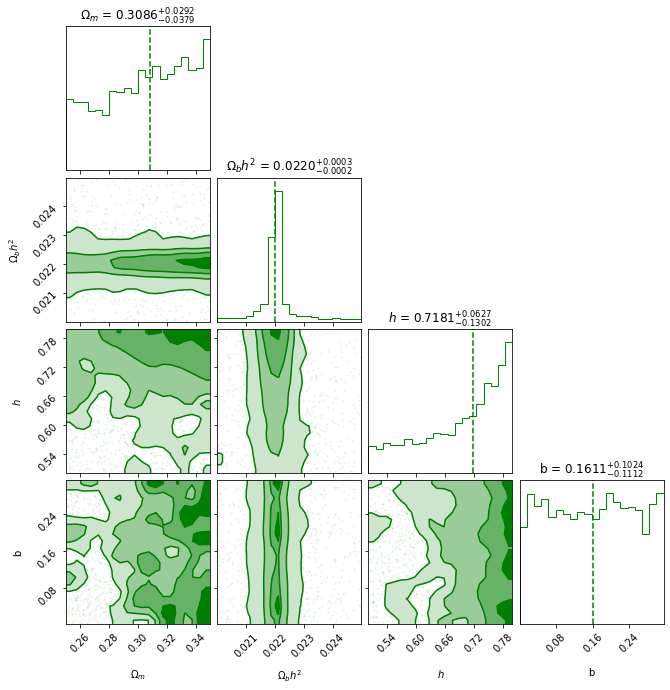

In [59]:
figure = corner.corner(chain,labels=["$\Omega_m$", "$\Omega_bh^2$", "$h$","b"],
                       bins = 20,
                       weights = npchain[:,1],
                       color='g',
                       quantiles=[0.5],
                       show_titles=True, 
                       title_fmt = '.4f',
                       smooth=True, 
                       fill_contours = True,
                       title_kwargs={"fontsize": 12}, 
                  )
plt.savefig('img/corner_nled_Pantheon.png', dpi=300)

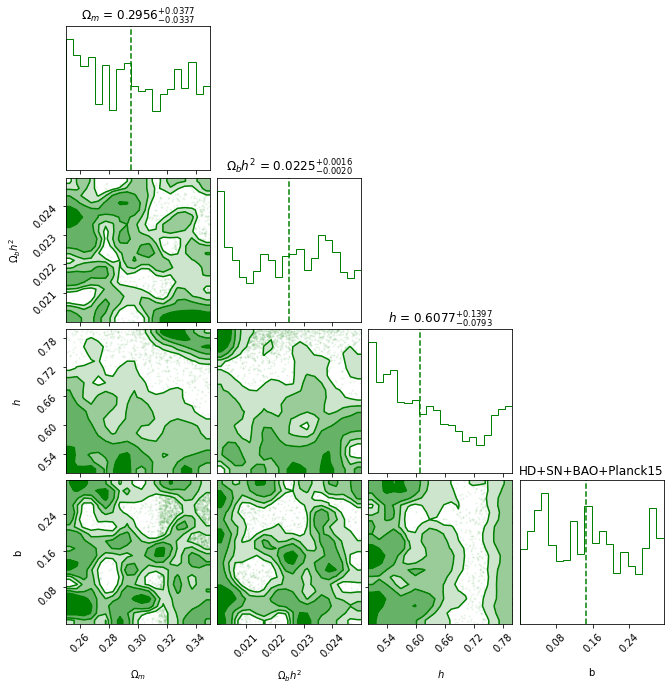

In [28]:
outputname = dir_name+chain1
npchain = np.loadtxt(outputname)
chain = npchain[:,2:6]
np.shape(chain)

figure = corner.corner(chain,labels=["$\Omega_m$", "$\Omega_bh^2$", "$h$","b"],
                       bins = 20,
                       weights = npchain[:,1],
                       color='g',
                       quantiles=[0.5],
                       show_titles=True, 
                       title_fmt = '.4f',
                       smooth=True, 
                       fill_contours = True,
                       title_kwargs={"fontsize": 12}, 
                  )

plt.title('HD+SN+BAO+Planck15')
plt.savefig('img/corner_nled_hd_sn_bao_planck15_corner.png', dpi=300)